# Linear Regression Multiple Variables

Loosely following from "Machine Learning Tutorial Python," YouTube video by codebasics, [click here to view](https://youtu.be/J_LnPL3Qg70). Finding the square error function to predict house prices with multiple features.

Data is my own list from houses recently sold in my area, retrieved from Zillow on 12/9/2021.

**Note:** This is just for me to practice using the equations, matrices and machine learning. The sample size is way too small and too simple to make conclusions in real-world modeling. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [2]:
# Import csv to df
df = pd.read_csv('home_prices.csv')
df.head()

,sell_date,price_k,sqft,bed,bath,lot,year,garage_cars
0,12/3/2021,447,3395,4,4,0.35,1997,2
1,12/3/2021,365,2750,3,4,0.25,1992,2
2,12/1/2021,450,2891,3,3,0.16,2017,2
3,11/29/2021,235,1392,2,1,0.20,1947,2
4,11/29/2021,145,1094,3,1,0.24,1921,0


In [3]:
# GOAL
# Hypothesis: hθ(x) = θ0 + θ1x1 + θ2x2 + ... + θnxn
# coefficients (m1, m2, ..., mn), intercept b
# x1 = m1 and so on for features


# If need to clean data from NAs, 
# Find median value and insert into
# NAs, like example below:

import math
median_bedrooms = math.floor(df.bed.median())
df.bed = df.bed.fillna(median_bedrooms)

In [4]:
# Add age in years of house

df['age'] = (2021 - df.year)
df

,sell_date,price_k,sqft,bed,bath,lot,year,garage_cars,age
0,12/3/2021,447,3395,4,4,0.35,1997,2,24
1,12/3/2021,365,2750,3,4,0.25,1992,2,29
2,12/1/2021,450,2891,3,3,0.16,2017,2,4
3,11/29/2021,235,1392,2,1,0.20,1947,2,74
4,11/29/2021,145,1094,3,1,0.24,1921,0,100
5,11/15/2021,262,2068,3,2,0.23,1955,0,66
6,11/12/2021,444,3016,5,3,0.21,2019,2,2


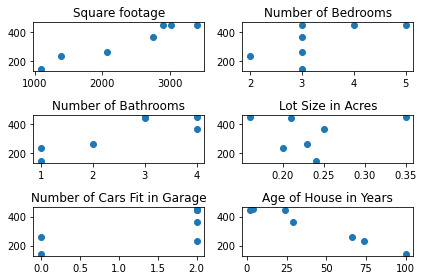

In [5]:
# Plot to see what features 
# coorelate to price and which
# do not have much, if any,
# impact on sale price

fig, axs = plt.subplots(3, 2)

axs[0, 0].scatter(df.sqft, df.price_k)
axs[0, 0].set_title("Square footage")

axs[0, 1].scatter(df.bed, df.price_k)
axs[0, 1].set_title("Number of Bedrooms")

axs[1, 0].scatter(df.bath, df.price_k)
axs[1, 0].set_title("Number of Bathrooms")

axs[1, 1].scatter(df.lot, df.price_k)
axs[1, 1].set_title("Lot Size in Acres")

axs[2, 0].scatter(df. garage_cars, df.price_k)
axs[2, 0].set_title("Number of Cars Fit in Garage")

axs[2, 1].scatter(df.age, df.price_k)
axs[2, 1].set_title("Age of House in Years")

fig.tight_layout()

The three that most coorelate are square footage, number of bathrooms, and age of house. 

In [6]:
# Coefficient returns our m1, m2, ... m6

# Create class object
reg = linear_model.LinearRegression()

# Train model with df
reg.fit(df[['sqft', 'bath', 'age']], df['price_k'])

# Could also assign to variables:
# X = df[['sqft', 'bed', 'bath', 'lot', 'garage_cars', 'age']]
# y = df['price_k']

LinearRegression()

In [7]:
reg.coef_

array([  0.09140752, -18.14543229,  -1.73424394])

In [8]:
reg.intercept_

239.32048891601676

In [9]:
# Predict price of home
# Test 1:
# 2150 sqft, 2 bath, 26 years old

reg.predict([[2150, 2, 26]])

array([354.46545247])

In [10]:
# Test 2:
# 1700 sqft, 1 bath, 40 years old

reg.predict([[1700, 1, 40]])

array([307.19808504])

In [11]:
# Test 3:
# 3400 sqft, 3 bath, 4 years old

reg.predict([[3400, 3, 4]])

array([488.73278841])

In [15]:
d = {
    'area': [900, 1200, 1500, 1750, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'baths': [1, 1, 1.5, 1, 2, 1.5, 2, 2, 2.5, 3, 3],
    'age': [81, 50, 48, 15, 10, 53, 7, 4, 12, 9, 5]
}
df2 = pd.DataFrame(data=d)

prices = reg.predict(np.array(df2))

In [16]:
df2['est_price_in_k'] = prices
df2

,area,baths,age,est_price_in_k
0,900,1.0,81,162.968066
1,1200,1.0,50,244.151885
2,1500,1.5,48,265.969913
3,1750,1.0,15,355.124560
4,2000,2.0,10,368.502227
5,2500,1.5,53,348.706215
6,3000,2.0,7,465.112480
7,3500,2.0,4,516.018973
8,4000,2.5,12,538.776066
9,4500,3.0,9,580.609842


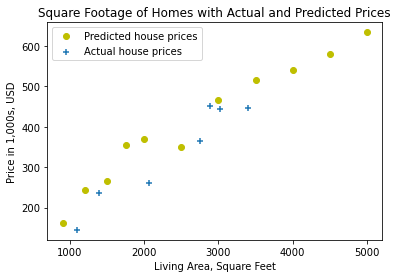

In [27]:
# New chart with actual, predicted: Square Footage

%matplotlib inline

# Actual prices
plt.xlabel('Living Area, Square Feet')
plt.ylabel('Price in 1,000s, USD')
plt.scatter(df.sqft, df.price_k, marker="+", label="Actual house prices")

# Predicted prices
plt.plot(df2.area, df2.est_price_in_k, "yo", label="Predicted house prices")

plt.title("Square Footage of Homes with Actual and Predicted Prices")
plt.legend()

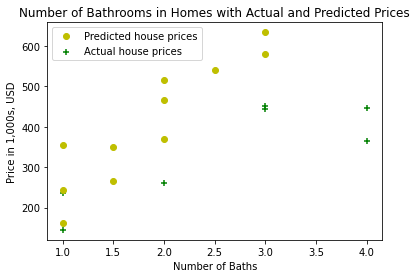

In [28]:
# New chart with actual, predicted: Bathrooms

%matplotlib inline

# Actual prices
plt.xlabel('Number of Baths')
plt.ylabel('Price in 1,000s, USD')
plt.scatter(df.bath, df.price_k, marker="+", color="green", label="Actual house prices")

# Predicted prices
plt.plot(df2.baths, df2.est_price_in_k, "yo", label="Predicted house prices")

plt.title("Number of Bathrooms in Homes with Actual and Predicted Prices")
plt.legend()

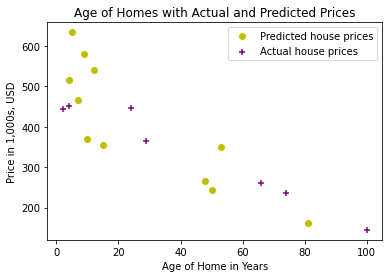

In [30]:
# New chart with actual, predicted: Age of House

%matplotlib inline

# Actual prices
plt.xlabel('Age of Home in Years')
plt.ylabel('Price in 1,000s, USD')
plt.scatter(df.age, df.price_k, marker="+", color="purple", label="Actual house prices")

# Predicted prices
plt.plot(df2.age, df2.est_price_in_k, "yo", label="Predicted house prices")

plt.title("Age of Homes with Actual and Predicted Prices")
plt.legend()